<h1  style = "font-size:30px;background-color: White ; color : Black; text-align: center; border-radius: 20px 20px; text-decoration: underline; font-style : italic;">👩‍💻Machine learning model : Implementation from Scratch👩‍💻</h1

The aim of this exercise is to implement from scratch a model of machine learning and to use it on a dataset.

In [39]:
#Importation of the libraries needed
from typing import Protocol, Tuple, List #Typing library : In python the types of variables
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sn
import math
sn.set() # graphical library
import matplotlib.pyplot as plt
import abc # abstract class

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# can use named colors or HTML codes
colormap = np.array(['red', 'lightseagreen', '#F39C12'])
cmap = sn.dark_palette((200, 1000,45), input="husl",as_cmap=True)

<h1  style = "font-size:30px; color : Green; text-align: left;"> 📜 1. Dataset analyzing</h1>

We chose from the library `datasets` the one speaking about cancer. Let's import it and convert it in a dataframe mode.

In [4]:
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer['data'], columns = cancer['feature_names'])
df.to_csv('diabetes.txt', sep = ',', index = False)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
print("There are", len(df), "rows and ", len(df.columns), "columns.")  

There are 569 rows and  30 columns.


This dataset represents different criteria which show the causes that can increase the risks of having cancer disease. The one below reprensents the targets and shows which patient has the disease. 

In [6]:
# dataset of the targets
y = pd.DataFrame(data=cancer['target'])
y.columns = ['target']
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [7]:
#Let's check if the dataset doesn't have NaN values
print(f'There is {df.isna().sum().sum()} NaN values for the dataset.')
print(f'There is {y.isna().sum().sum()} NaN values for the targets.')


There is 0 NaN values for the dataset.
There is 0 NaN values for the targets.


Let's show the repartition of the targets.

Text(0, 0.5, 'quantity')

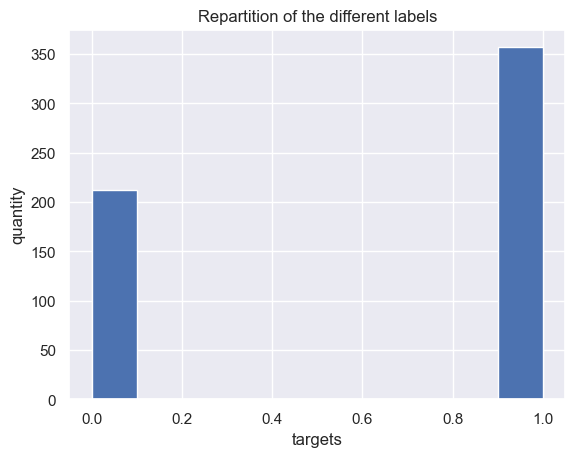

In [8]:
plt.hist(y)
plt.title('Repartition of the different labels')
plt.xlabel('targets')
plt.ylabel('quantity')

We want to know which columns are the most correlated with an other.  
A correlation matrix was unreadable because of the high number of columns.  
So we decided to list the top 10 best and worst correlations.

In [11]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("The best correlations found are :")
print(get_top_correlations(df, 10))

def get_worst_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("The worst correlations found are :")
print(get_worst_correlations(df, 10))

The best correlations found are :
mean radius      mean perimeter     0.997855
worst radius     worst perimeter    0.993708
mean radius      mean area          0.987357
mean perimeter   mean area          0.986507
worst radius     worst area         0.984015
worst perimeter  worst area         0.977578
radius error     perimeter error    0.972794
mean perimeter   worst perimeter    0.970387
mean radius      worst radius       0.969539
mean perimeter   worst radius       0.969476
dtype: float64
The worst correlations found are :
mean fractal dimension   radius error               0.000111
fractal dimension error  worst perimeter            0.001000
                         worst texture              0.003195
mean area                worst fractal dimension    0.003738
mean perimeter           fractal dimension error    0.005523
mean texture             smoothness error           0.006614
mean radius              worst fractal dimension    0.007066
mean texture             symmetry error

As we can see above, the difference between the best pairs of correlations and the worst are huge.  
It will certainly help our model to determine correctly our predictions.

<h1  style = "font-size:30px; color : Green; text-align: left;"> 📜 1. Ridge regression from Scratch</h1>

The columns being highly correlated, we chose the ridge regression. It enables to stabilize the data.  
Let's remind that to help estimate the parameter $\theta$, we use the *Maximum Likelihood Estimator* (MLE). But sometimes, it can overfits because it picks the parameters that are good for the training data.  
The formula for ridge regression is as followed:

\begin{equation}
y = X\beta + \epsilon
\end{equation}

where :
* y is the target variable 
* X is the matrix of input variables
* $\beta$ is the vector of coefficients
* $\epsilon$ is the error term.  

The aim is to minimize the loss function where we have added a penalty term. It can be reprensented by 
\begin{equation}
\ L(\beta) =  \sum_{i=1}^n (y_i -  x_{i}^{T}\beta)^2 + \alpha \sum_{j=1}^p \beta_j^2 
\end{equation}
where :
* $n$ is the number of observations 
* $p$ is the number of variables
* $\mathbf{x}_i$ is the vector of the variable of the $i$-e observation
* $y_i$ is the target
* $\beta$ is the vecteur we want to minimize
* $\alpha$ is the ridge term.

The partial derivative of the cost function is:

$$\frac{\partial L}{\partial \beta_j} = -2\sum_{i=1}^n (y_i - \sum_{k=1}^p x_{i}^{T}\beta)x_{ij} + 2\alpha \beta_j $$

Let's now implement from scratch the Ridge regression.  
For that, we use the class used during the course to help us.

In [13]:
class MachineLearningModel(Protocol): 
    def fit(self, X:np.ndarray, y:np.ndarray, *args, **kwargs):
        Protocol.fit(X, y)
    def predict(X: np.ndarray, *args, **kwargs) -> np.ndarray:
        Protocol.predict(X)
        
class AibtMachineLearningModel(abc.ABC): 
    @abc.abstractmethod
    def fit(self, X: np.ndarray, y: np.ndarray) -> "AibtMachineLearningModel":
        raise NotImplementedError("You should implement fit method")
    
    @abc.abstractmethod
    def predict(self, X:np.ndarray) -> np.ndarray:
        raise NotImplementedError("You should implement predict method")

In [14]:
class RidgeRegression:
    
    def __init__(self, learning_rate = 1e-3):
        """
        Initialization
        """
        self.learning_rate = learning_rate
        self.bias = None  
        
        
    def _initialize_parameters(self, X):
        n_features = np.shape(X)[1]
        # Initialize parameters between [-1/sqrt(N), 1/sqrt(N)]
        limit = 1 / math.sqrt(n_features)
        self.bias = np.random.uniform(-limit, limit, (1))
    
    def fit(self, x, y):
        """
        Training of the model
        """
        #implementation of the parameters initialized
        self._initialize_parameters(x)
        # Add a column of ones to X 
        x = np.hstack([np.ones((x.shape[0], 1)), x])

        # Compute the solution for beta
        beta = x.T.dot(x)
        # Definition of the number of features for the following step
        n_features = x.shape[1]
        # Compute the bias
        self.bias = np.linalg.solve(beta + self.learning_rate * np.eye(n_features), x.T.dot(y))

    def predict(self, x):
        # Add a column of ones to X 
        x = np.hstack([np.ones((x.shape[0], 1)), x])

        # Predict the target 
        y_pred = x.dot(self.bias)

        return y_pred

Now, let's see if our model works.  
We separate our datasets into a train set and a test set.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size = 0.9)

Then, we normalize our data.

In [17]:
class Normalizer:
    def __init__(self):
        self.mean = None
        self.std = None
        self.epsilon = 1e-6
    
    def fit(self, X: np.array, y=None): # y=None is a scikit learn convention
        # Compute the mean for each columns
        self.mean = np.mean(X, axis = 0)
        # Compute the standard deviation for each columns
        self.std = np.std(X, axis = 0)
        return self
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        X_norm = (X - self.mean)/self.std # safe division
        return X_norm

normaliser = Normalizer()
normaliser.fit(x_train)
normaliser.fit(x_test)
x_train = normaliser.transform(x_train)
x_test = normaliser.transform(x_test)


Finally, we use our Ridge Regression.

In [31]:
ridge = RidgeRegression()
# Fitting of the model
ridge.fit(x_train, y_train)
# Prediction of the targets
y_pred = ridge.predict(x_train)

Finally, we calculate the mean squared error.

In [37]:
print(f'The mean squared error of our model is {mean_squared_error(y_train, y_pred)}.')

The mean squared error of our model is 0.05224117472055724.


As we can see above, the mean squared error is low. It means that our model is pretty effective.

Let's now plot a graph wich will represent the different labels.  
The dataset having 30 columns, it will be impossible to plot it. So we will use the PCA method, which enables to reduce the dimensionality of our dataset by conserving the maximum of informations we have.

In [40]:
pca = PCA(n_components = 2)
scaler = StandardScaler()

#Normalisation
X = scaler.fit_transform(x_train)

# Transformed data
transformed_data = pca.fit_transform(X)
transformed_data

array([[-5.44750688, -0.44530042],
       [ 1.10283265,  1.1094833 ],
       [ 2.21972781,  1.06249683],
       ...,
       [-2.61450241,  1.4297931 ],
       [-4.69535554, -1.74907357],
       [-0.78647437,  0.13625201]])

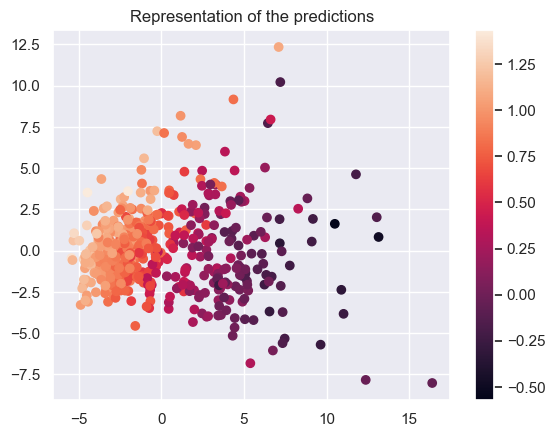

In [43]:
graph = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c = y_pred, label = 'data')
plt.title('Representation of the predictions')
plt.colorbar(graph)
plt.show()